# Data analysis and vizualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
merged_df=pd.read_csv('/master_table.csv')

In [10]:
merged_df.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,call_start_date,call_start_time,agent_assigned_date,...,call_duration,agent_response_time,call_start_day,primary_call_reason,agent_tone,customer_tone,average_sentiment,silence_percent_average,customer_name,mp_status
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,31 07 2024,23:56:00,01 08 2024,...,38.0,7.0,2,Voluntary Cancel,neutral,angry,-0.04,0.39,Matthew Foster,4.0
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,01 08 2024,00:03:00,01 08 2024,...,15.0,3.0,3,Booking,calm,neutral,0.02,0.35,Tammy Walters,NaN
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,31 07 2024,23:59:00,01 08 2024,...,27.0,8.0,2,IRROPS,neutral,polite,-0.13,0.32,Jeffery Dixon,NaN
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,01 08 2024,00:05:00,01 08 2024,...,12.0,5.0,3,Upgrade,neutral,frustrated,-0.20,0.20,David Wilkins,2.0
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,01 08 2024,00:04:00,01 08 2024,...,19.0,10.0,3,Seating,neutral,polite,-0.05,0.35,Elizabeth Daniels,0.0


In [11]:
# Descriptive statistics for numerical columns
merged_df.describe()

,call_id,customer_id,agent_id,call_duration,agent_response_time,call_start_day,average_sentiment,silence_percent_average,mp_status
count,7.181000e+04,7.181000e+04,71810.000000,71810.000000,71810.000000,71810.000000,71810.000000,71810.000000,46043.000000
mean,4.993574e+09,5.004334e+09,564768.278039,18.901936,7.284459,4.119705,-0.032035,0.285515,1.370871
std,2.889673e+09,2.884255e+09,257532.362167,13.079690,2.518830,1.893813,0.130002,0.192031,1.322297
min,1.316420e+05,1.197800e+04,102574.000000,3.000000,3.000000,0.000000,-0.350000,0.000000,0.000000
25%,2.480013e+09,2.514618e+09,347606.000000,11.000000,5.000000,3.000000,-0.110000,0.130000,0.000000
50%,4.989448e+09,4.999664e+09,591778.000000,15.000000,7.000000,5.000000,-0.020000,0.260000,1.000000
75%,7.493629e+09,7.509126e+09,786323.000000,22.000000,9.000000,6.000000,0.050000,0.410000,2.000000
max,9.999806e+09,9.999935e+09,993862.000000,129.000000,15.000000,6.000000,0.290000,0.980000,5.000000


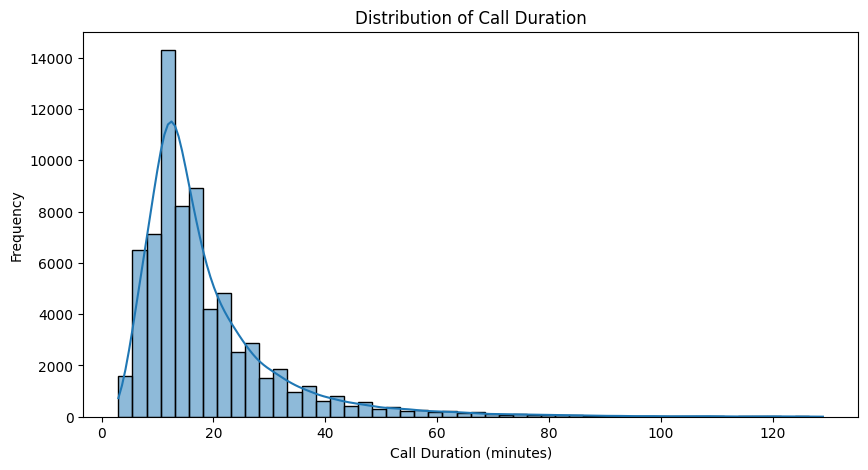

In [16]:
# Histogram for call duration
plt.figure(figsize=(10, 5))
sns.histplot(merged_df['call_duration'], bins=50, kde=True)
plt.title('Distribution of Call Duration')
plt.xlabel('Call Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

The histogram shows a right-skewed distribution of call durations, with most calls lasting between 0 and 20 minutes. The highest frequency is around 10 to 15 minutes, with over 14,000 calls recorded in this range.

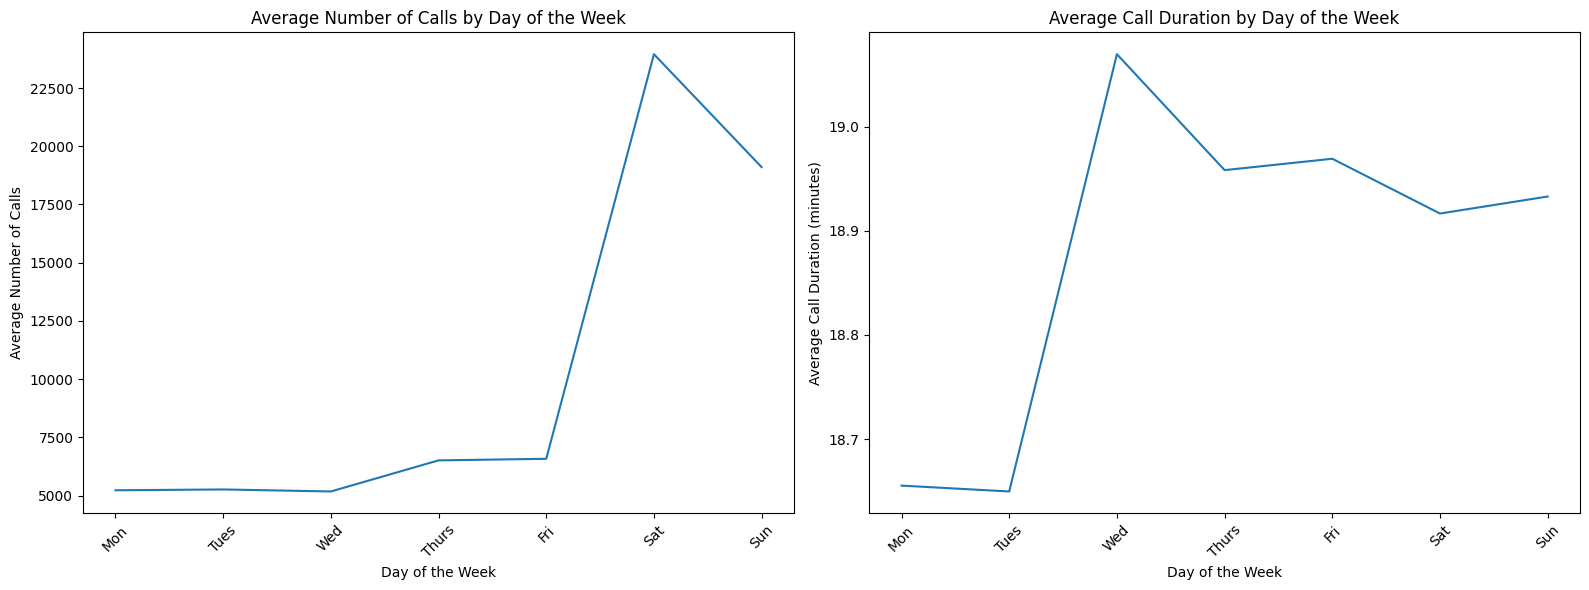

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Group by call_start_day (day of the week) and calculate the mean number of calls
daily_call_count = merged_df.groupby('call_start_day')['call_id'].count()

# Step 2: Create a mapping of day numbers to day names
day_mapping = {0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thurs', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

# Step 3: Replace the numeric index with day names for call count
daily_call_count.index = daily_call_count.index.map(day_mapping)

# Step 4: Group by call_start_day (day of the week) and calculate the mean call duration
daily_call_duration = merged_df.groupby('call_start_day')['call_duration'].mean()

# Step 5: Replace the numeric index with day names for call duration
daily_call_duration.index = daily_call_duration.index.map(day_mapping)

# Step 6: Create subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot the average number of calls by day of the week
sns.lineplot(x=daily_call_count.index, y=daily_call_count.values, ax=ax[0])
ax[0].set_title('Average Number of Calls by Day of the Week')
ax[0].set_xlabel('Day of the Week')
ax[0].set_ylabel('Average Number of Calls')
ax[0].tick_params(axis='x', rotation=45)

# Plot the average call duration by day of the week
sns.lineplot(x=daily_call_duration.index, y=daily_call_duration.values, ax=ax[1])
ax[1].set_title('Average Call Duration by Day of the Week')
ax[1].set_xlabel('Day of the Week')
ax[1].set_ylabel('Average Call Duration (minutes)')
ax[1].tick_params(axis='x', rotation=45)

# Show the plots
plt.tight_layout()
plt.show()


The maximum number of incoming calls occurs on Saturday, while the longest call duration is observed on Wednesday.




In [12]:
# Clean and preprocess Primary Call Reasons
def preprocess_text(text):
    words = nltk.word_tokenize(text.lower())  # Tokenize and convert to lowercase
    stop_words = set(stopwords.words('english'))  # Get stopwords
    words = [word for word in words if word.isalpha() and word not in stop_words]  # Filter out non-alphabetic words and stopwords
    return ' '.join(words)

# Apply preprocessing
merged_df['processed_primary_call_reason'] = merged_df['primary_call_reason'].dropna().astype(str).apply(preprocess_text)

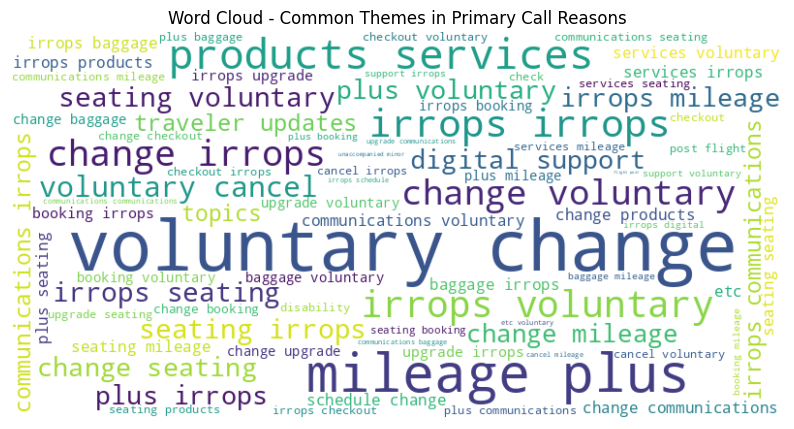

In [13]:
# Combine all processed primary call reasons into a single string
primary_reasons_combined = ' '.join(merged_df['processed_primary_call_reason'].dropna())

# Generate the word cloud
wordcloud_primary_reason = WordCloud(width=800, height=400, background_color='white').generate(primary_reasons_combined)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_primary_reason, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Common Themes in Primary Call Reasons')
plt.show()

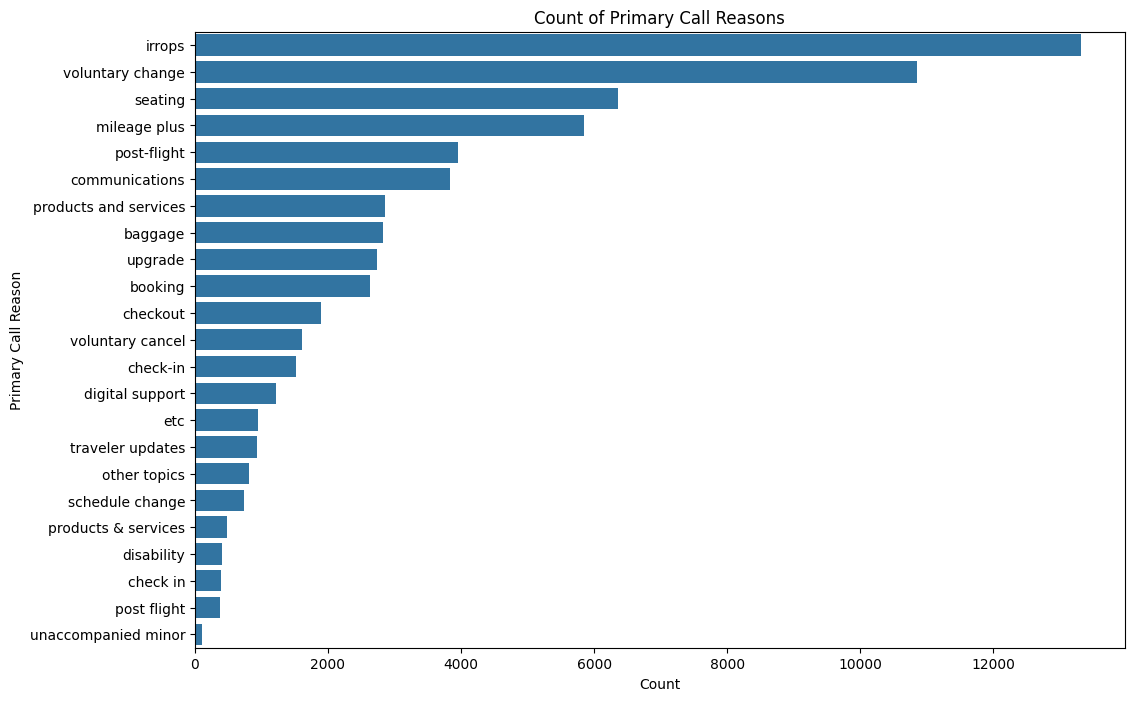

In [15]:
# Count plot for primary call reasons
# Clean the 'primary_call_reason' column by removing leading/trailing whitespaces and converting to lowercase
merged_df['primary_call_reason'] = merged_df['primary_call_reason'].str.strip().str.lower().str.replace(r'\s+', ' ', regex=True)

# Create a new figure with a size of 12x8 inches
plt.figure(figsize=(12, 8))

# Plot the count of 'primary_call_reason' and ensure only unique reasons are shown, sorted by count
sns.countplot(y='primary_call_reason', data=merged_df,
              order=merged_df['primary_call_reason'].value_counts().index)


plt.title('Count of Primary Call Reasons')
plt.xlabel('Count')
plt.ylabel('Primary Call Reason')
plt.show()


The primary reason for incoming calls is "irregular operations (irrops)", as indicated by the word cloud and primary reason count, followed by "voluntary changes" and "seating issues" and so on. We will now conduct further analysis to identify trends associated with "irregular operations (irrops)".

     Keyword  Frequency
5     flight     631962
0      agent     555458
3   customer     549932
8        let     310728
2     change     248693
6       help     201067
9       like     194177
13     thank     184727
17    united     173306
1    calling     159962
11      okay     156940
16    typing     155719
7       just     135322
18      work     134236
4        day     133868
15      time     127528
10      need     126268
19      yeah     123142
12    really     119979
14    thanks     119782


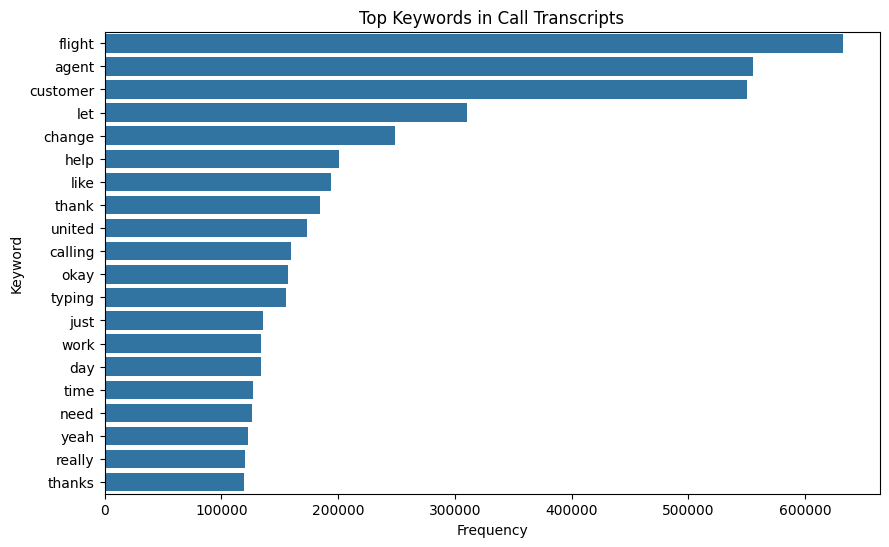

In [43]:
# Extract keywords from call transcripts
vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(merged_df['call_transcript'])

# Get top keywords
keywords = vectorizer.get_feature_names_out()
keyword_counts = X.sum(axis=0).A1

# Display top keywords
keyword_freq = pd.DataFrame({'Keyword': keywords, 'Frequency': keyword_counts}).sort_values(by='Frequency', ascending=False)
print(keyword_freq)

# Plot the top keywords
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Keyword', data=keyword_freq)
plt.title('Top Keywords in Call Transcripts')
plt.show()

1. The analysis reveals frequently used words that highlight key topics during customer calls. For example, the term "flight" appears 631,962 times, indicating that discussions often revolve around flight-related issues.

2. Other high-frequency words, such as "agent," "customer," "help," and "change," suggest that callers frequently seek assistance or wish to modify their bookings, primarily concerning United Airlines.

3. The terms like "help" and "change" indicates that many callers are looking for support with their bookings. This insight presents an opportunity to enhance self-service options in the IVR (Interactive Voice Response) system. Additionally, casual terms such as "okay" and "yeah" point to a conversational tone in interactions, reflecting customer engagement levels.

4. Words like "need," "thanks," and "calling" shed light on customer intentions. The use of "need" implies a sense of urgency, showing that callers often feel they require immediate assistance, while "thanks" suggests positive interactions or resolutions.

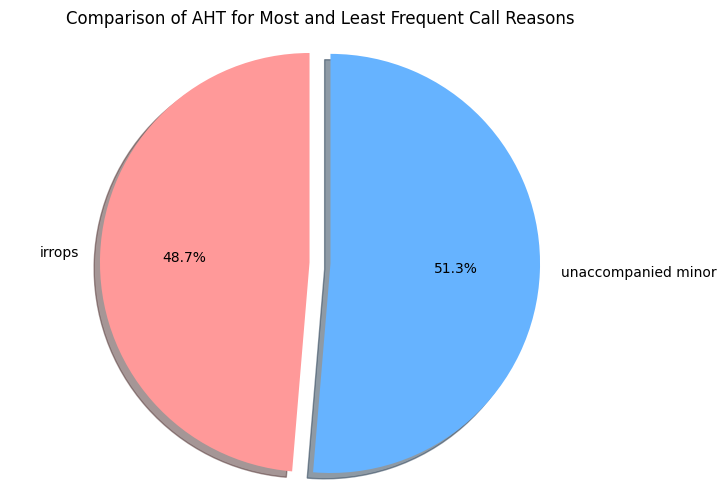

Most Frequent Call Reason: irrops, AHT: 19.09 minutes
Least Frequent Call Reason: unaccompanied minor, AHT: 20.12 minutes
Percentage Difference in AHT: -5.16%


In [23]:
# Identify the most and least frequent call reasons
call_reason_counts = merged_df['primary_call_reason'].value_counts()
most_frequent_reason = call_reason_counts.index[0]  # Most frequent call reason
least_frequent_reason = call_reason_counts.index[-1]  # Least frequent call reason

# Compute AHT for most and least frequent call reasons
most_frequent_AHT = merged_df[merged_df['primary_call_reason'] == most_frequent_reason]['call_duration'].mean()
least_frequent_AHT = merged_df[merged_df['primary_call_reason'] == least_frequent_reason]['call_duration'].mean()

# Data for the pie chart
labels = [most_frequent_reason, least_frequent_reason]
sizes = [most_frequent_AHT, least_frequent_AHT]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode the most frequent reason slice

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Comparison of AHT for Most and Least Frequent Call Reasons')
plt.show()

# Print AHT values
print(f"Most Frequent Call Reason: {most_frequent_reason}, AHT: {most_frequent_AHT:.2f} minutes")
print(f"Least Frequent Call Reason: {least_frequent_reason}, AHT: {least_frequent_AHT:.2f} minutes")

# Percentage difference in AHT
percentage_difference_AHT = ((most_frequent_AHT - least_frequent_AHT) / least_frequent_AHT) * 100
print(f"Percentage Difference in AHT: {percentage_difference_AHT:.2f}%")

The AHT for irrops is **5.16%** lower than the AHT for unaccompanied minor calls

In [25]:
# Filter dataset for IRROPS calls
irrops_calls = merged_df[merged_df['primary_call_reason'] == 'irrops']

# Basic overview of IRROPS calls
irrops_calls.describe()

,call_id,customer_id,agent_id,call_duration,agent_response_time,call_start_day,average_sentiment,silence_percent_average,mp_status
count,1.331100e+04,1.331100e+04,13311.000000,13311.000000,13311.000000,13311.000000,13311.000000,13311.000000,7929.000000
mean,5.041152e+09,4.962688e+09,562601.104124,19.086620,6.001352,4.125686,-0.069848,0.309404,1.245807
std,2.896394e+09,2.872999e+09,257278.730953,13.186585,1.413150,1.888689,0.132269,0.196594,1.231007
min,3.255270e+05,1.570607e+06,102574.000000,4.000000,4.000000,0.000000,-0.350000,0.000000,0.000000
25%,2.491445e+09,2.465586e+09,347606.000000,11.000000,5.000000,3.000000,-0.150000,0.150000,0.000000
50%,5.080698e+09,4.948403e+09,591778.000000,15.000000,6.000000,5.000000,-0.060000,0.280000,1.000000
75%,7.567216e+09,7.465686e+09,782403.000000,23.000000,7.000000,6.000000,0.010000,0.450000,2.000000
max,9.999806e+09,9.999935e+09,993862.000000,125.000000,8.000000,6.000000,0.290000,0.930000,5.000000


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


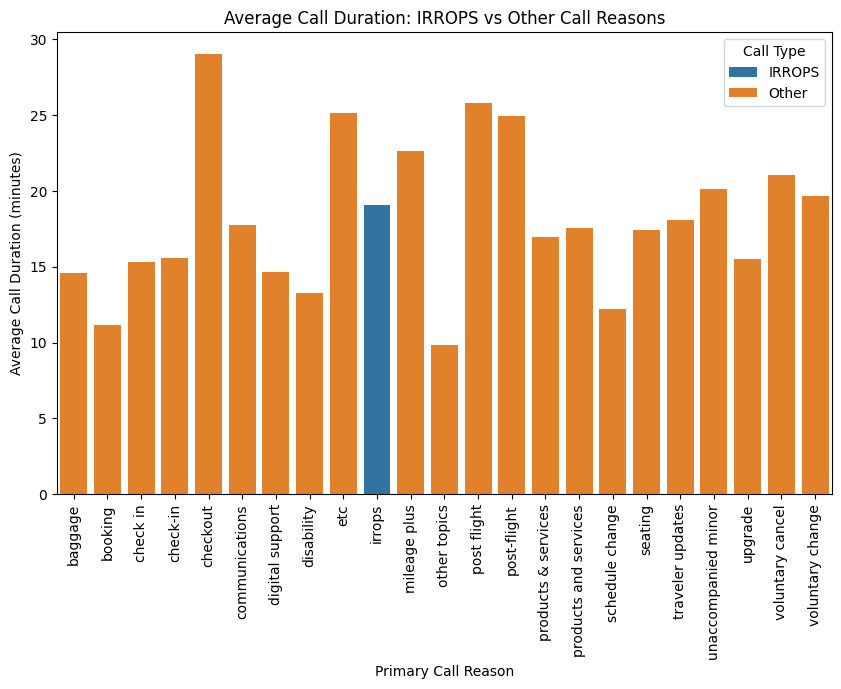

In [26]:
# Compare call duration for IRROPS and other call reasons
# Calculate average call duration for each primary call reason
average_duration = merged_df.groupby('primary_call_reason')['call_duration'].mean().reset_index()

# Add a column indicating if the reason is IRROPS or not
average_duration['Call Type'] = average_duration['primary_call_reason'].apply(lambda x: 'IRROPS' if x.lower().strip() == 'irrops' else 'Other')

# Prepare data for plotting
# Ensure the 'Call Type' is ordered for better visualization
average_duration['Call Type'] = pd.Categorical(average_duration['Call Type'], categories=['IRROPS', 'Other'], ordered=True)

# Visual comparison with a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='primary_call_reason', y='call_duration', data=average_duration, hue='Call Type', dodge=False)
plt.title('Average Call Duration: IRROPS vs Other Call Reasons')
plt.xticks(rotation=90)
plt.ylabel('Average Call Duration (minutes)')
plt.xlabel('Primary Call Reason')
plt.show()

Mileage Plus calls take the longest, averaging nearly 29 minutes. Post-flight, products & services, and traveler updates last around 20-25 minutes, while shorter calls like check-in, schedule changes, and unaccompanied minor are about 10-15 minutes. IRROPS calls average about 20 minutes.

Average sentiment for IRROPS: -0.06984814528911037
Average sentiment for other calls: -0.02343071053387447


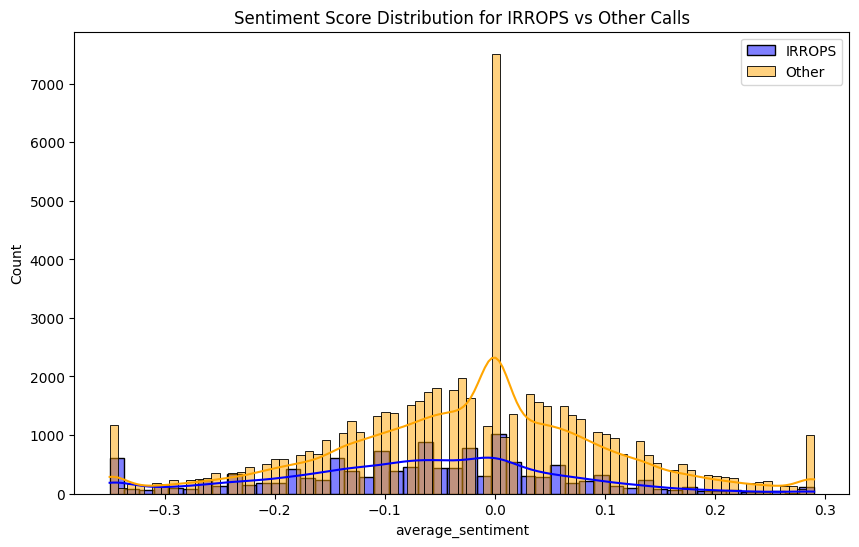

In [27]:
# Sentiment analysis for IRROPS calls
irrops_sentiment = irrops_calls['average_sentiment'].mean()

# Sentiment analysis for other calls
other_calls_sentiment = merged_df[merged_df['primary_call_reason'] != 'irrops']['average_sentiment'].mean()

print(f'Average sentiment for IRROPS: {irrops_sentiment}')
print(f'Average sentiment for other calls: {other_calls_sentiment}')

# Plot the distribution of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(irrops_calls['average_sentiment'], color='blue', label='IRROPS', kde=True)
sns.histplot(merged_df[merged_df['primary_call_reason'] != 'irrops']['average_sentiment'], color='orange', label='Other', kde=True)
plt.legend()
plt.title('Sentiment Score Distribution for IRROPS vs Other Calls')
plt.show()

 Both call types show negative sentiment, but IRROPS calls have a more even distribution, hinting at more frustration.

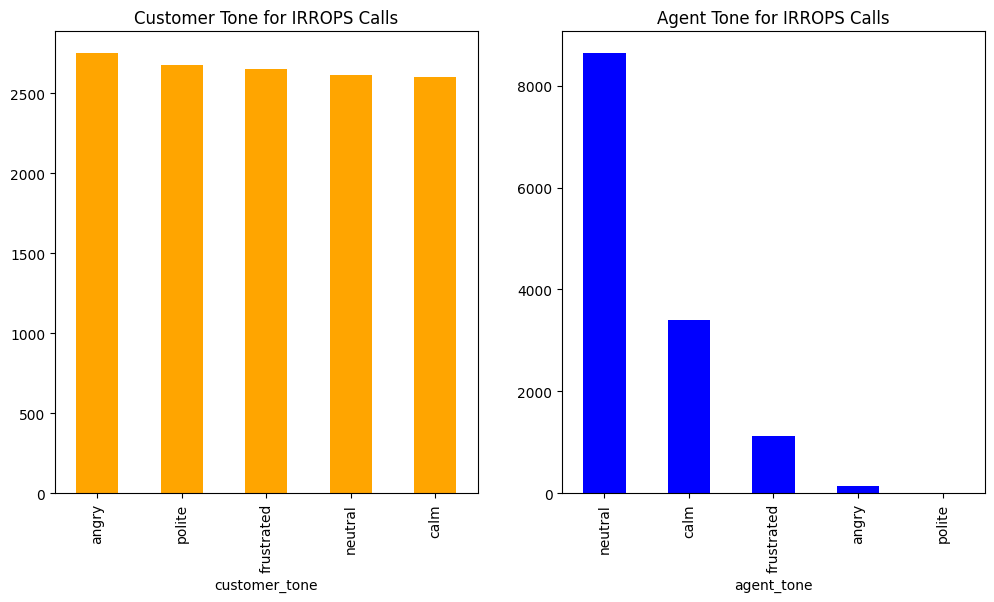

In [28]:
# Tone analysis for IRROPS calls
irrops_customer_tone = irrops_calls['customer_tone'].value_counts()
irrops_agent_tone = irrops_calls['agent_tone'].value_counts()

# Visualize customer and agent tone
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
irrops_customer_tone.plot(kind='bar', color='orange')
plt.title('Customer Tone for IRROPS Calls')

plt.subplot(1, 2, 2)
irrops_agent_tone.plot(kind='bar', color='blue')
plt.title('Agent Tone for IRROPS Calls')

plt.show()

Customer tones are evenly spread, with 2,500-2,700 calls per tone (angry, polite, frustrated, neutral, calm), showing varied emotions.This suggests that customer emotion vary widely, with no single tone dominating.

Agents, however, mostly use a neutral tone (8,000+ calls), followed by calm (around 4,000), with frustrated, angry, and polite tones being rare.

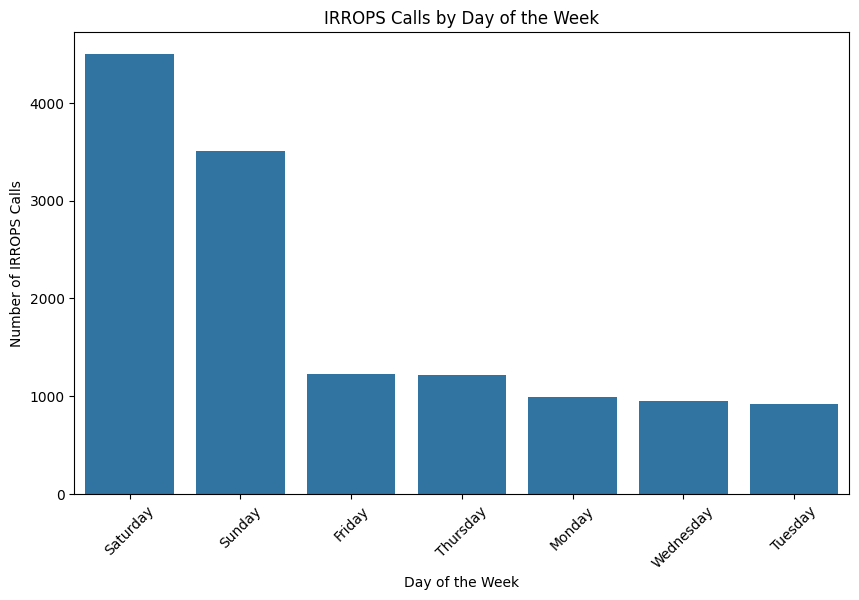

In [30]:
# Group by the 'call_start_day' and count the number of IRROPS calls
irrops_by_day = irrops_calls.groupby('call_start_day')['call_id'].count().reset_index()

# Create a mapping of numbers to day names
day_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

# Map the 'call_start_day' numbers to day names
irrops_by_day['call_start_day_name'] = irrops_by_day['call_start_day'].map(day_mapping)

# Sort the data for better visualization (optional)
irrops_by_day = irrops_by_day.sort_values(by='call_id', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='call_start_day_name', y='call_id', data=irrops_by_day)
plt.title('IRROPS Calls by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of IRROPS Calls')
plt.xticks(rotation=45)
plt.show()

Most of the incoming calls about irregular operations (irrops) happened on Saturday, with a total of 4,500 calls followed by  Sunday, coincides with the peak day for incoming calls, which is Saturday.

<ipython-input-36-ccd5c3978795>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  irrops_calls['call_start_datetime'] = pd.to_datetime(merged_df['call_start_datetime'], errors='coerce')
<ipython-input-36-ccd5c3978795>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  irrops_calls.loc[:, 'hour'] = irrops_calls['call_start_datetime'].dt.hour


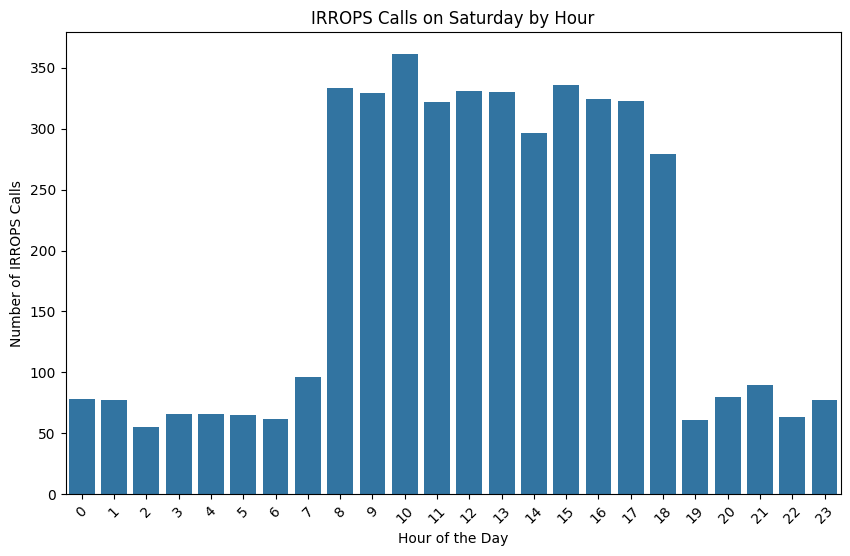

In [36]:
irrops_calls['call_start_datetime'] = pd.to_datetime(merged_df['call_start_datetime'], errors='coerce')

# Create 'hour' column from 'call_start_datetime' using .loc
irrops_calls.loc[:, 'hour'] = irrops_calls['call_start_datetime'].dt.hour

# Now filter the dataset for only Saturday calls
saturday_irrops_calls = irrops_calls[irrops_calls['call_start_day'] == 5]  # 5 corresponds to Saturday

# Group by hour and count the number of IRROPS calls
irrops_by_hour = saturday_irrops_calls.groupby('hour')['call_id'].count().reset_index()

# Rename the columns for clarity
irrops_by_hour.columns = ['call_start_hour', 'call_count']

# Sort the data for better visualization
irrops_by_hour = irrops_by_hour.sort_values(by='call_count', ascending=False)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='call_start_hour', y='call_count', data=irrops_by_hour)
plt.title('IRROPS Calls on Saturday by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of IRROPS Calls')
plt.xticks(rotation=45)
plt.show()

Peak Call Hours: Particularly around late morning (10 AM) to early afternoon (3 PM), have significantly more IRROPS calls.

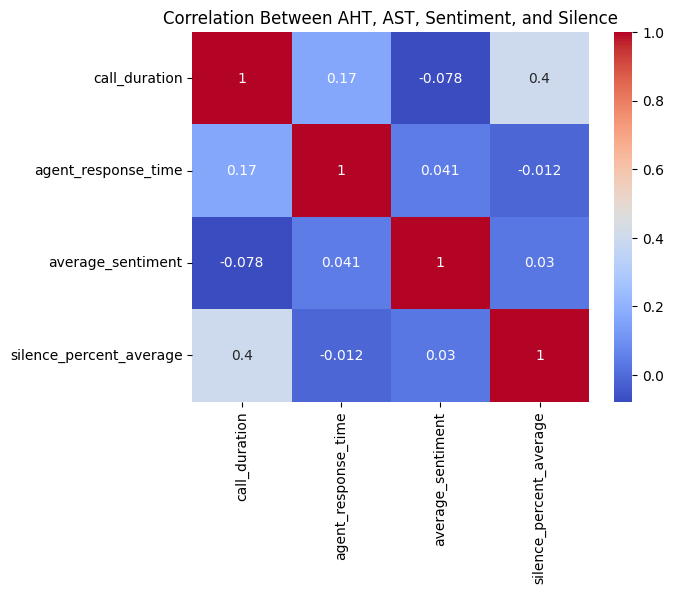

                         call_duration  agent_response_time  \
call_duration                 1.000000             0.165169   
agent_response_time           0.165169             1.000000   
average_sentiment            -0.077825             0.041278   
silence_percent_average       0.399125            -0.012068   

                         average_sentiment  silence_percent_average  
call_duration                    -0.077825                 0.399125  
agent_response_time               0.041278                -0.012068  
average_sentiment                 1.000000                 0.030277  
silence_percent_average           0.030277                 1.000000  


In [37]:
# Correlation matrix for relevant factors
correlation_matrix = merged_df[['call_duration', 'agent_response_time', 'average_sentiment', 'silence_percent_average']].corr()

# Visualize the correlation
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between AHT, AST, Sentiment, and Silence')
plt.show()
print(correlation_matrix)

Call_duration and agent_response_time (0.165): Weak positive correlation; longer response times may lead to longer calls.

call_duration and average_sentiment (-0.077): Weak negative correlation; more positive sentiment slightly correlates with shorter calls.

call_duration and silence_percent_average (0.399): Moderate positive correlation; more silence is associated with longer calls.

In [39]:
import statsmodels.api as sm

# Define your dependent variable (y) and independent variables (X)
X = merged_df[['agent_response_time', 'average_sentiment', 'silence_percent_average']]
y = merged_df['call_duration']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Build the regression model
model = sm.OLS(y, X).fit()

# Summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          call_duration   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     5896.
Date:                Wed, 09 Oct 2024   Prob (F-statistic):               0.00
Time:                        15:58:18   Log-Likelihood:            -2.7862e+05
No. Observations:               71810   AIC:                         5.572e+05
Df Residuals:                   71806   BIC:                         5.573e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

**Call Duration and Agent Response Time:**

Correlation Coefficient: 0.165 (weak positive correlation).

OLS Coefficient: 0.9039 (strong positive impact).

Analysis: Although the correlation is weak, the regression model indicates a significant and strong relationship, suggesting that longer agent response times contribute notably to longer call durations.

**Call Duration and Average Sentiment:**

Correlation Coefficient: -0.077 (weak negative correlation).

OLS Coefficient: -9.7842 (significant negative impact).

Analysis: The correlation suggests a slight inverse relationship, but the regression result shows that more positive sentiments significantly reduce call duration, indicating that sentiment plays a critical role beyond what the correlation alone suggests.

**Call Duration and Silence Percent Average:**

Correlation Coefficient: 0.399 (moderate positive correlation).

OLS Coefficient: 27.5289 (strong positive impact).

Analysis: Both the correlation and regression results indicate a strong relationship. Increased silence during calls is associated with significantly longer call durations, confirming the importance of managing silence in calls.

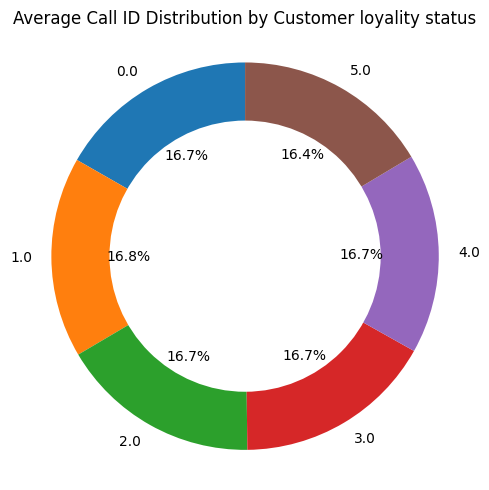

In [41]:
# Calculate average call_id by mp_status
average_data = merged_df.groupby('mp_status')['call_id'].mean().reset_index()

# Create a donut chart
fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(aspect="equal"))

# Create the donut chart
wedges, texts, autotexts = ax.pie(
    average_data['call_id'],
    labels=average_data['mp_status'],
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.tab10.colors  # Change color palette as needed
)

# Draw a circle at the center of the donut to create a "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that the pie chart is a circle.
ax.axis('equal')

# Set title
plt.title('Average Call ID Distribution by Customer loyality status')

# Show the plot
plt.tight_layout()
plt.show()

The chart shows that customers from all loyalty tiers are interacting with the company (or being identified by call ID) at nearly equal rates. Each tier represents around 16.4% to 16.8%.